In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling1D, Flatten
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import models, layers
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# Spliting the dataset into training and testing sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
print(x_train.shape)
print(x_test.shape)

In [ ]:
x_train[0]  # Displaying the first image of the training set

In [ ]:
y_test[:5]  # Displaying the first 5 labels of the test set

In [ ]:
y_train = y_train.reshape(-1,)

In [ ]:
y_train[:5]  # Displaying the first 5 labels of the training set

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
y_test[:5]  # Displaying the first 5 labels of the test set

In [ ]:
x_train = x_train/ 255.0
x_test = x_test/ 255.0

In [ ]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
def sample_plot(x, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

In [ ]:
sample_plot(x_train, y_train, 9)  # Displaying the ninth image of the training set with its label

In [ ]:
sample_plot(x_train, y_train, 67)  # Displaying the 67 image of the training set with its label

# **ANN Model**

In [ ]:
model = Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
]
)

model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
                metrics=['accuracy']
                )

model.fit(x_train, y_train, epochs=5)

In [ ]:
ypred = model.predict(x_test)
ypred_classes = [np.argmax(element) for element in ypred]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, ypred_classes))

# **CNN Model**

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import models, layers
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Spliting the dataset into training and testing sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [3]:
print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [4]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [5]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

In [6]:
def plot_sample(x, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

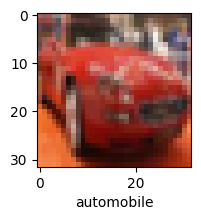

In [7]:
plot_sample(x_train, y_train, 5)

In [8]:
x_train = x_train/ 255.0
x_test = x_test/ 255.0

In [14]:
def cnn_model(input_shape = (32, 32, 3)):
    model = Sequential()
    model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
    model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))

    model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
    model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))

    model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
    model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))

    model.add(Flatten())
    model.add(Dense(521, activation = 'relu'))
    model.add(Dense(10, activation = 'softmax'))

    return model



In [15]:
model = cnn_model()
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 10)
ypred = model.predict(x_train)
ypred = model.predict(x_test) 
ypred_class = [np.argmax(i) for i in ypred]

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 34ms/step - accuracy: 0.3555 - loss: 1.7394
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.6336 - loss: 1.0204
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 32ms/step - accuracy: 0.7211 - loss: 0.7864
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.7726 - loss: 0.6481
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 34ms/step - accuracy: 0.8106 - loss: 0.5389
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.8431 - loss: 0.4452
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 32ms/step - accuracy: 0.8711 - loss: 0.3618
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.8958 - loss: 0.2947
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.9172 - loss: 0.2346
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.9258 - loss: 0.2068
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
